# **Εισαγωγές**


### **Εισαγωγή βιβλιοθηκών**

Εισάγουμε τις βιβλιοθήκες και τα βασικά εργαλεία για την μετέπειτα χρήση τους στην διαδικαςσία της ανάλυσης.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### **Εισαγωγή δεδομένων**

Στην συνέχεια εισάγουμε τα δεδομένα χρησιμοποιώντας ένα Dataframe της pandas, μέσω της εντολής **.read_csv()**. Η επιτυχής εκτέλεση της εντολής αυτής **προυποθέτει την μεταφόρτωση του αρχείου `ecoli.data` στα έγγραφα του notebook.** Εάν θέλουμε να εισάγουμε τα δεδομένα απο κάποιον άλλο κατάλογο, αρκεί να ορίσουμε την διαδρομή στην εντολή. 

Π.χ. `df = pd.read_csv("path/to/file", delim_whitespace=True)` 

Παρόλλο που το αρχείο δεν είναι της μορφής **.csv**, η εντολή `.read_csv()` μπορεί, μέσω ειδικής παραμέτρου, να καταλάβει οτι οι μεταβλητές χωρίζονται με τον χαρακτήρα του κενού στην προκείμενη περίπτωση. Χρησιμοποιώντας της εντόλη `.head()` στο dataframe μπορούμε να δούμε τα πρώτα αποτελέσματα του συνόλου δεδομένων, τόσα όσα έχουμε δηλώσει στην παράμετρο της συνάρτησης.

In [2]:
df = pd.read_csv("ecoli.data", delim_whitespace=True)
df.head(8)

,AAT_ECOLI,0.49,0.29,0.48,0.50,0.56,0.24,0.35,cp
0,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
1,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
2,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
3,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
4,ALKH_ECOLI,0.67,0.39,0.48,0.5,0.36,0.38,0.46,cp
5,AMPD_ECOLI,0.29,0.28,0.48,0.5,0.44,0.23,0.34,cp
6,AMY2_ECOLI,0.21,0.34,0.48,0.5,0.51,0.28,0.39,cp
7,APT_ECOLI,0.20,0.44,0.48,0.5,0.46,0.51,0.57,cp


Τυπώνοντας τα πρώτα αποτελέσματα στην οθόνη μπορούμε να δούμε οτι δεν υπάρχουν labels να περιγράφουν τις στήλες του συνόλου. Έχωντας μελετήσει το αρχείο `ecoli.names` το οποίο περιέχει πληροφορίες για το σύνολο δεδομένων, μπορούμε να βρούμε τα ονόματα της κάθε στήλης και να τα προσθέσουμε στο Dataframe. Στην διαδικασία της ανάλυσης μπορεί να μην χρειαστούν, αλλά τα προσθέτουμε για την δική μας διευκόλυνση.

In [3]:
df.columns = ['Sequence Name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2','target']
df.head(8)

,Sequence Name,mcg,gvh,lip,chg,aac,alm1,alm2,target
0,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
1,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
2,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
3,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
4,ALKH_ECOLI,0.67,0.39,0.48,0.5,0.36,0.38,0.46,cp
5,AMPD_ECOLI,0.29,0.28,0.48,0.5,0.44,0.23,0.34,cp
6,AMY2_ECOLI,0.21,0.34,0.48,0.5,0.51,0.28,0.39,cp
7,APT_ECOLI,0.20,0.44,0.48,0.5,0.46,0.51,0.57,cp


# **Εξερεύνηση δεδομένων**

### **Ελλειπείς τιμές**

Για αρχή, κάνουμε έναν έλεγχο για ελλειπείς τιμές σε κάποια απο τις στήλες του συνόλου, και βλέπουμε οτι δεν υπάρχει κάποια έλλειψη.

In [4]:
df.isnull().sum()

Sequence Name    0
mcg              0
gvh              0
lip              0
chg              0
aac              0
alm1             0
alm2             0
target           0
dtype: int64

### **Στατιστικά Dataframe**

Με την χρήση της εντολής `.describe()` μπορούμε να δούμε κάποια χρήσιμα στατιστικά που περιγράφουν το σύνολο δεδομένων, όπως μέση τιμή, τυπική απόκλειση, ελάχιστη και μέγιστη τιμή παρατηρήσεων κλπ.

In [5]:
df.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,0.500090,0.500627,0.495522,0.501493,0.499851,0.500955,0.500179
std,0.194924,0.147932,0.088624,0.027318,0.122515,0.215603,0.209563
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.490000,0.460000,0.430000
75%,0.665000,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


### **Συντελεστής συσχέτισης**

Στην συνέχεια, μπορύμε να υπολογίσουμε το συντελεστή γραμικής συσχέτισης για την εύρεση της συσχέτισης μεταξύ των στηλών του Dataframe. Ο συντελεστής αυτός μπορεί να εκτιμήσει το βαθμό γραμμικής συσχέτισης μεταξύ των μεταβλητών και κυμαίνεται μεταξύ του 0 (καμία συσχέτιση) και 1 (πλήρης θετική γραμμική συσχέτιση), με τις τιμές κάτω απο 0 να δηλώνουν αρνητική γραμμική συχέτιση.

Για την απεικόνιση αυτού, χρησιμοποιούμε ένα heatmap απο την βιβλιοθήκη `seaborn`, το οποίο αναπαριστά χρωματικά την συσχέτιση αυτή. Όπως παρατηρούμε, η πιο ισχυρή συσχέτιση στηλών είναι αυτή με το πιο φωτεινό χρώμα. Αυτή, πέρα απο την κύρια διαγώνιο του πίνακα, είναι μεταξύ των στηλών **alm1** και **alm2**. Ενώ αντίστοιχα, αρνητική συσχέτιση παρουσιάζουν οι στήλες **alm2** και **gvh**.

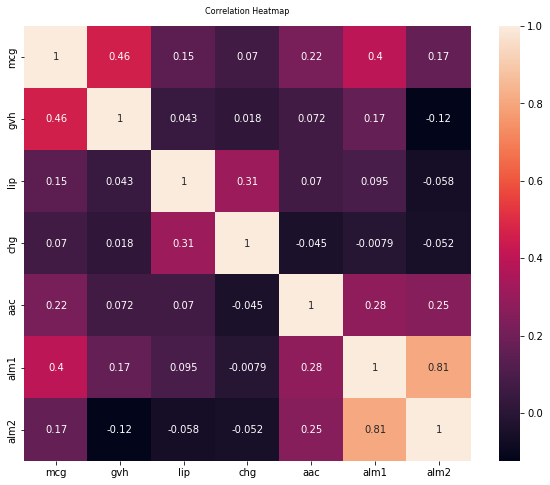

In [6]:
plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)
plt.show()

### **Ιστογράμματα μεταβλητών**

Στο επόμενο κομμάτι κώδικα, σχεδιάζουμε ένα ιστόγραμμα για κάθε στήλη του Dataframe, με σκοπό να έχουμε μια εικόνα για την κατανομή των τιμών της εκάστοτε στήλης. Για την απεικόνιση τους, χρησιμοποιούμε ξανά την βιβλιοθήκη `seaborn`.

Μεγάλο ενδιαφέρον παρουσιάζουν τα αποτελέσματα που παράγονται:
1. Διαπιστώνουμε οτι οι τιμές της μεταβλητής Sequence Name δεν είναι καθόλου ευδιάκριτες, που σημαίνει οτι θα πρέπει να το ερευνήσουμε παραπάνω μετέπειτα.
2. Οι περισσότερες μεταβλητές ακολουθούν μια κανονική κατανομή στις τιμές τους, όμως η μεταβλητή **target** παρουσιάζει μια **μη ισορροπημένη** κατανομή στις τιμές των κλάσεων της. Σίγουρα μπορούμε να το ερευνήσουμε παραπάνω.

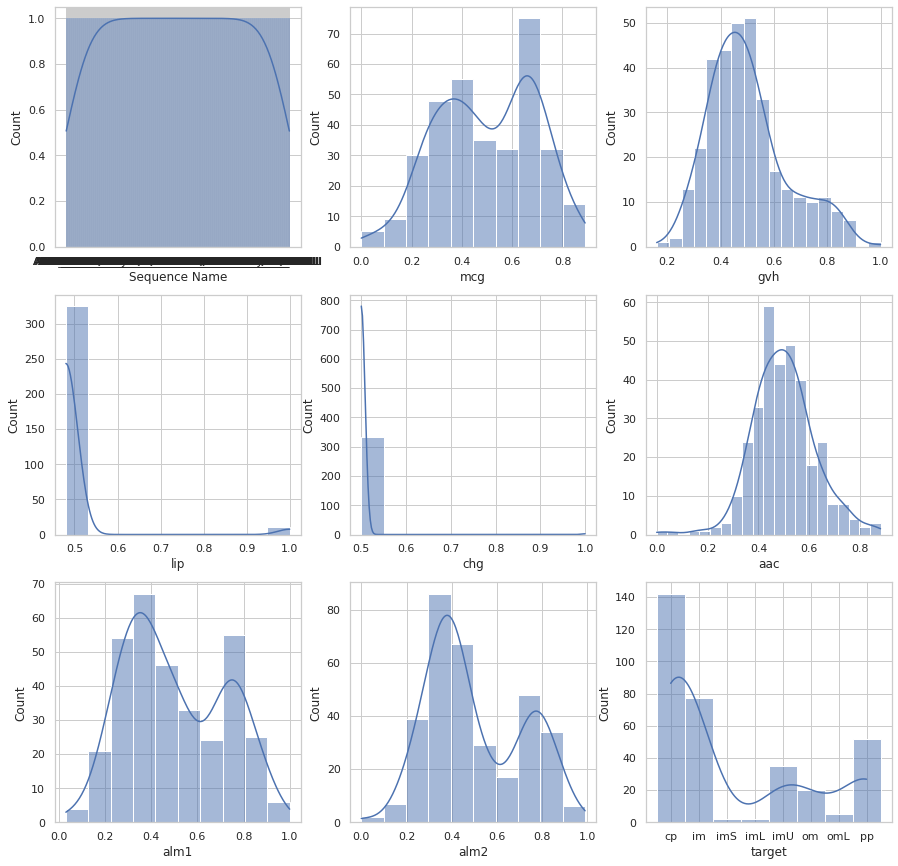

In [7]:
sns.set(font_scale=1)
sns.set_style('whitegrid')

# scatter plots of each column (variable)
# define the number of subplots (number of rows x number of columns) 
n_rows=3
n_cols=3

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
for i, column in enumerate(df):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i // n_cols, i % n_cols])

### **Υπολογισμός μοναδικών τιμών**

Ερευνόντας περεταίρω τις παραπάνω παρατηρήσεις, βρίσκουμε τις μοναδικές τιμές που έχει η μεταβλητή Sequence Name μέσω της εντολής `.unique()` και υπολογίζουμε το άθροισμα τους.

Παρατηρούμε οτι υπάρχουν 335 ξεχωριστές τιμές για την συγκεκριμένη μεταβλητή και ελέγχοντας το σχήμα (μέγεθος πίνακα) του Dataframe μας, βλέπουμε οτι τόσες είναι και οι γραμμές (εγγραφές) που το απαρτίζουν. Καταλαβαίνουμε λοιπόν οτι αυτή η μεταβλητή λειτουργέι σαν **unique identifier** της κάθε εγγραφής, και δεν θα μας είναι αρκετά χρήσιμη στην ανάλυση που θα ακολουθήσει.

In [8]:
len(df['Sequence Name'].unique())

335

In [9]:
df.shape

(335, 9)

### **Υπολογισμός κατανομής τιμών μεταβλητής στόχου**

Για την μεταβλητή target, ο παρακάτω κώδικας υπολογίζει το άθροισμα αλλά και το ποσοστό εμφάνισης, για κάθε μια απο τις τιμές της. Αυτό γίνεται με την βοήθεια της βιβλιοθήκης `collections` και συγκεκριμένα με το πακέτο `Counter`.

Τα αποτελέσματα και σε αυτήν την περίπτωση έχουν ενδιαφέρον, καθώς επαληθέυονται οι αρχικές εκτιμήσεις περί μη ισορροπημένων κλάσεων.

Η κλάση με όνομα **cp** κατέχει σχεδόν το **42.4%** όλων των τιμών της μεταβλητής, με την κλάση **im** να έρχεται σε δεύτερη θέση με μόλις το **22.9%** των εγγραφών.

In [10]:
import collections
from collections import Counter

counter = Counter(df['target'])
for i,j in counter.items():
  percent = j / len(df['target']) * 100
  print('Class: %s => count = %d, percentage = %.3f%%' % (i,j,percent))

Class: cp => count = 142, percentage = 42.388%
Class: im => count = 77, percentage = 22.985%
Class: imS => count = 2, percentage = 0.597%
Class: imL => count = 2, percentage = 0.597%
Class: imU => count = 35, percentage = 10.448%
Class: om => count = 20, percentage = 5.970%
Class: omL => count = 5, percentage = 1.493%
Class: pp => count = 52, percentage = 15.522%


### **Οπτικοποίηση κατανομής τιμών μεταβλητής στόχου**



Για την οπτικοποίηση των παραπάνω αποτελεσμάτων, χρησιμοποιούμε ένα scatter plot, με την χρήση της βιβλιοθήκης `matplotlib`. Στον άξονα x τοποθετούμε την μεταβλητή **gvh** και στον άξονα y την μεταβλητή **alm2**, καθώς έχουν αρνητική γραμμική συσχέτιση μεταξύ τους, και θα κάνουν την εικόνα πιο ξεκάθαρη. Για την κάθε κλάση χρησιμοποιούμε ξεχωριστό χρώμα, όπως αναγράφεται και στο legend του σχήματος.

Παρατηρούμε λοιπόν οτι και σχηματικά, οι δύο επικρατέστερες κλάσεις είναι οι **cp** και **im**, με την **pp** να έρχεται στην τρίτη θέση με ένα **15.5%** των εγγραφών.

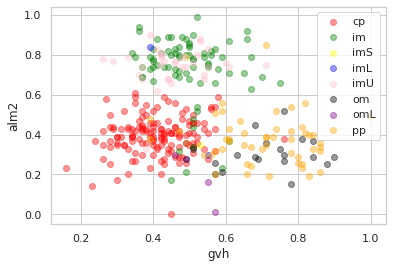

In [11]:
colors = ['red', 'green', 'yellow', 'blue', 'pink', 'black', 'purple', 'orange']
species = ['cp','im','imS', 'imL', 'imU', 'om', 'omL', 'pp']

for i in range(8):
    x = df[df['target'] == species[i]]
    plt.scatter(x['gvh'], x['alm2'], c = colors[i], label=species[i], alpha=0.4)
plt.xlabel("gvh")
plt.ylabel("alm2")
plt.legend()

# **Προεπεξεργασία δεδομένων**

Σε αυτό το σημείο τελειώνει η φάση της εξερεύνησης των δεδομένων, και προχωράμε στην εφαρμογή των μοντέλων κατηγοριοποίησης. Πρώτα όμως, ετοιμάζουμε την παρακάτω συνάρτηση για μια γρήγορα προεπεξεργασία των δεδομένων, βάσει των παρατηρήσεων που κάναμε μέχρι τώρα.

Η συνάρτηση `prepare_data()` δέχεται σαν είσοδο ένα Dataframe και κάνει τις εξής αλλαγές σε αυτό:
- Δημιουργέι ένα αντίγραφο για την διατήρηση του πρωτότυπου και εκτελεί όλες τις αλλαγές σε αυτό.
- Αφαιρεί την στήλη **Sequence Name** που όπως είχαμε δεί δεν μας χρησιμεύει στην ανάλυση.
- Με την χρήση του πακέτου `LabelEncoder()`, κωδικοποιεί τα ονόματα των κλάσεων στην μεταβλητή **target** ώστε να έχουν αριθμητικές τιμές και όχι χαρακτήρες (τιμές απο 0 έως 7)
- Και τέλος, χωρίζει το σύνολο δεδομένων σε δύο υποσύνολα, ένα για την εκπαίδευση των μοντέλων και ένα για την επαλήθευση και επικύρωση των αποτελεσμάτων του εκάστοτε μοντέλου.

In [12]:
def prepare_data(df):

  # Make a copy of the original dataset
  df_copy = df.copy()

  # Drop unnecessary column
  df_copy = df_copy.drop('Sequence Name', axis=1)

  # Label encoding
  le = LabelEncoder()
  df_copy['target'] = le.fit_transform(df_copy['target'])

  # Train-Test split
  X = df_copy.drop(columns=['target'])
  y = df_copy['target']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

  return X_train, X_test, y_train, y_test

### **Δημιουργία συνόλων εκπαίδευσης και επαλήθευσης**

Με την χρήση των τεσσάρων παρακάτω μεταβλητών, καλούμε την συνάρτηση προεπεξεργασίας και δημιουργούμε τα νέα σύνολα δεδομένων που απαιτούντα για την εκπαίδευση και την επικύρωση των μοντέλων.

In [13]:
X_train, X_test, y_train, y_test = prepare_data(df)

# **Εφαρμογή μοντέλων κατηγοριοποίησης**

## **Logistic Regression**

---



Ο πρώτος αλγόριθμος κατηγοριοποίησης που θα χρήσιμοποιήσουμε είναι αυτός της **Λογιστικής Παλινδρόμησης**.

Αφού εισάγουμε το πακέτο, δημιουργούμε το μοντέλο καλώντας τον constructor `LogisticRegression()` στην μεταβλητή `lr_model`.

Ύστερα, προσαρμόζουμε τα δεδομένα εκπαίδευσης στο μοντέλο, χρησιμοποιώντας την συνάρτηση `.fit()` η οποία δέχεται σαν παράμετρο τις δύο μεταβλητές Χ και y των δεδομένων εκπαίδευσης.

Τέλος, εμφανίζουμε τα αποτελέσμα απόδοσης του μοντέλου στα δεδομένα εκπαίδευσης.

In [14]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

print("Logistic Regression | Accuracy on training data: {:.2f}%".format(lr_model.score(X_train, y_train) * 100))

Logistic Regression | Accuracy on training data: 79.49%


Αντίστοιχα υπολογίζουμε τα αποτελέσματα απόδοσης του μοντέλου στα δεδομένα επαλήθευσης με την χρήση της συνάρτησης `.predict()`.

In [15]:
lr_pred = lr_model.predict(X_test)

lr_score = lr_model.score(X_test, y_test)
print("Logistic Regression | Accuracy on testing data: {:.2f}%".format(lr_score * 100))

Logistic Regression | Accuracy on testing data: 85.15%


Στην συνέχεια υπολογίζουμε και απεικονίζουμε τον πίνακα σύγχησης για κάθε κλάση που πρόβλεψε το μοντέλο αξιοποιώντας την συνάρτηση `confusion_matrix()`.

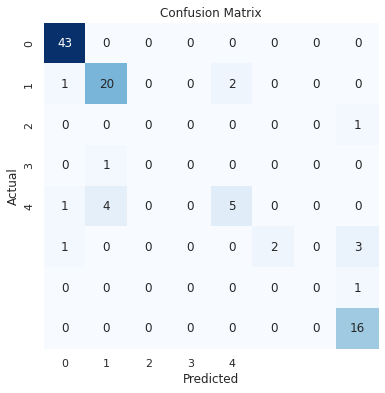

In [16]:
cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, vmin=0, cmap='Blues', cbar=False)
plt.xticks(np.arange(5) + 0.5, lr_model.classes_)
plt.yticks(np.arange(5) + 0.5, lr_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Τέλος, δύο ακόμα μετρικές που μπορούμε να υπολογίσουμε για την απόδοση του μοντέλου είναι η ακρίβεια και το f1 score. Αυτά γίνοτνται μέσω των συναρτήσεων `precision_score()` και `f1_score()` αντίστοιχα.

In [17]:
lr_prec = metrics.precision_score(y_test, lr_pred, average='weighted', zero_division=1)
print("Logistic Regression | Precision: {:.2f}%".format(lr_prec * 100))

Logistic Regression | Precision: 86.07%


In [18]:
lr_f1 = metrics.f1_score(y_test, lr_pred, average='weighted')
print("Logistic Regression | F1 Score: {:.2f}%".format(lr_f1 * 100))

Logistic Regression | F1 Score: 82.61%


## **K-Nearest Neighbors**

---

Ο επόμενος αλγόριθμος που θα χρήσιμοποιήσουμε είναι ο **Κ-Κοντινότεροι Γείτονες**.

Αφού εισάγουμε το πακέτο, δημιουργούμε το μοντέλο καλώντας τον constructor `KNeighborsClassifier()` στην μεταβλητή `knn_model`.

Ύστερα, προσαρμόζουμε τα δεδομένα εκπαίδευσης στο μοντέλο, χρησιμοποιώντας την συνάρτηση `.fit()` η οποία δέχεται σαν παράμετρο τις δύο μεταβλητές Χ και y των δεδομένων εκπαίδευσης.

Τέλος, εμφανίζουμε τα αποτελέσμα απόδοσης του μοντέλου στα δεδομένα εκπαίδευσης.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier() # default of 5 neighbours

knn_model.fit(X_train, y_train)

print("K-Nearest Neighbors | Accuracy on training data: {:.2f}%".format(knn_model.score(X_train, y_train) * 100))

K-Nearest Neighbors | Accuracy on training data: 89.32%


Αντίστοιχα υπολογίζουμε τα αποτελέσματα απόδοσης του μοντέλου στα δεδομένα επαλήθευσης με την χρήση της συνάρτησης `.predict()`.

In [20]:
knn_pred = knn_model.predict(X_test)

knn_score = knn_model.score(X_test, y_test)
print("K-Nearest Neighbors | Accuracy on testing data: {:.2f}%".format(knn_score * 100))

K-Nearest Neighbors | Accuracy on testing data: 88.12%


Στην συνέχεια υπολογίζουμε και απεικονίζουμε τον πίνακα σύγχησης για κάθε κλάση που πρόβλεψε το μοντέλο αξιοποιώντας την συνάρτηση `confusion_matrix()`.

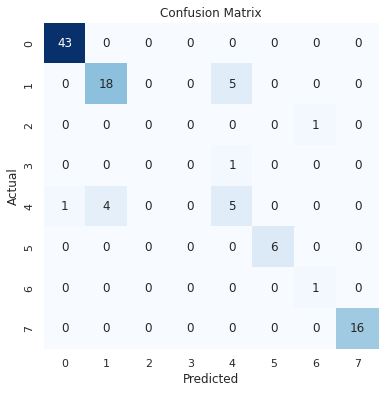

In [21]:
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, vmin=0, cmap='Blues', cbar=False)
plt.xticks(np.arange(8) + 0.5, knn_model.classes_)
plt.yticks(np.arange(8) + 0.5, knn_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Τέλος, δύο ακόμα μετρικές που μπορούμε να υπολογίσουμε για την απόδοση του μοντέλου είναι η ακρίβεια και το f1 score. Αυτά γίνοτνται μέσω των συναρτήσεων `precision_score()` και `f1_score()` αντίστοιχα.

In [22]:
knn_prec = metrics.precision_score(y_test, knn_pred, average='weighted', zero_division=1)
print("K-Nearest Neighbors | Precision: {:.2f}%".format(knn_prec * 100))

K-Nearest Neighbors | Precision: 89.00%


In [23]:
knn_f1 = metrics.f1_score(y_test, knn_pred, average='weighted')
print("K-Nearest Neighbors | F1 Score: {:.2f}%".format(knn_f1 * 100))

K-Nearest Neighbors | F1 Score: 87.46%


## **Decision Tree Classifier**

---

Ο επόμενος αλγόριθμος είναι το **Δέντρο Απόφασης**.

Αφού εισάγουμε το πακέτο, δημιουργούμε το μοντέλο καλώντας τον constructor `DecisionTreeClassifier()` στην μεταβλητή `dt_model`.

Ύστερα, προσαρμόζουμε τα δεδομένα εκπαίδευσης στο μοντέλο, χρησιμοποιώντας την συνάρτηση `.fit()` η οποία δέχεται σαν παράμετρο τις δύο μεταβλητές Χ και y των δεδομένων εκπαίδευσης.

Τέλος, εμφανίζουμε τα αποτελέσμα απόδοσης του μοντέλου στα δεδομένα εκπαίδευσης.

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=1, class_weight='balanced')

dt_model.fit(X_train, y_train)

print("Decision Tree | Accuracy on training data: {:.2f}%".format(dt_model.score(X_train, y_train) * 100))

Decision Tree | Accuracy on training data: 100.00%


Αντίστοιχα υπολογίζουμε τα αποτελέσματα απόδοσης του μοντέλου στα δεδομένα επαλήθευσης με την χρήση της συνάρτησης `.predict()`.

In [25]:
dt_pred = dt_model.predict(X_test)

dt_score = dt_model.score(X_test, y_test)
print("Decision Tree | Accuracy on testing data: {:.2f}%".format(dt_score * 100))

Decision Tree | Accuracy on testing data: 81.19%


Στην συνέχεια υπολογίζουμε και απεικονίζουμε τον πίνακα σύγχησης για κάθε κλάση που πρόβλεψε το μοντέλο αξιοποιώντας την συνάρτηση `confusion_matrix()`.

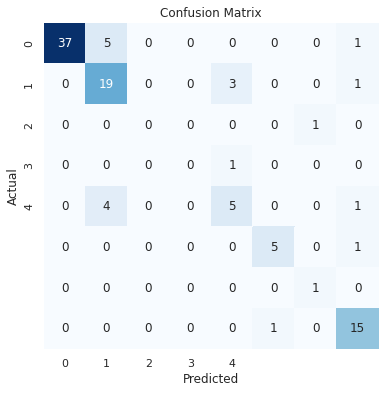

In [26]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, vmin=0, cmap='Blues', cbar=False)
plt.xticks(np.arange(5) + 0.5, lr_model.classes_)
plt.yticks(np.arange(5) + 0.5, lr_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Τέλος, δύο ακόμα μετρικές που μπορούμε να υπολογίσουμε για την απόδοση του μοντέλου είναι η ακρίβεια και το f1 score. Αυτά γίνοτνται μέσω των συναρτήσεων `precision_score()` και `f1_score()` αντίστοιχα.

In [27]:
dt_prec = metrics.precision_score(y_test, dt_pred, average='weighted', zero_division=1)
print("Decision Tree | Precision: {:.2f}%".format(dt_prec * 100))

Decision Tree | Precision: 83.46%


In [28]:


dt_f1 = metrics.f1_score(y_test, dt_pred, average='weighted')
print("Decision Tree | F1 Score: {:.2f}%".format(dt_f1 * 100))

Decision Tree | F1 Score: 80.75%


## **Random Forest Classifier**

---

Ο τελευταίος αλγόριθμος είναι το **Random Forest Classfier**.

Αφού εισάγουμε το πακέτο, δημιουργούμε το μοντέλο καλώντας τον constructor `RandomForestClassifier()` στην μεταβλητή `rf_model`.

Ύστερα, προσαρμόζουμε τα δεδομένα εκπαίδευσης στο μοντέλο, χρησιμοποιώντας την συνάρτηση `.fit()` η οποία δέχεται σαν παράμετρο τις δύο μεταβλητές Χ και y των δεδομένων εκπαίδευσης.

Τέλος, εμφανίζουμε τα αποτελέσμα απόδοσης του μοντέλου στα δεδομένα εκπαίδευσης.

In [29]:
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50, random_state=1, class_weight='balanced')

rf_model.fit(X_train,y_train)

print("Random Forest | Accuracy on training data: {:.2f}%".format(rf_model.score(X_train, y_train) * 100))

Random Forest | Accuracy on training data: 99.57%


Αντίστοιχα υπολογίζουμε τα αποτελέσματα απόδοσης του μοντέλου στα δεδομένα επαλήθευσης με την χρήση της συνάρτησης `.predict()`.

In [30]:
rf_pred = rf_model.predict(X_test)

rf_score = rf_model.score(X_test, y_test)
print("Random Forest | Accuracy on testing data: {:.2f}%".format(rf_score * 100))

Random Forest | Accuracy on testing data: 89.11%


Στην συνέχεια υπολογίζουμε και απεικονίζουμε τον πίνακα σύγχησης για κάθε κλάση που πρόβλεψε το μοντέλο αξιοποιώντας την συνάρτηση `confusion_matrix()`.

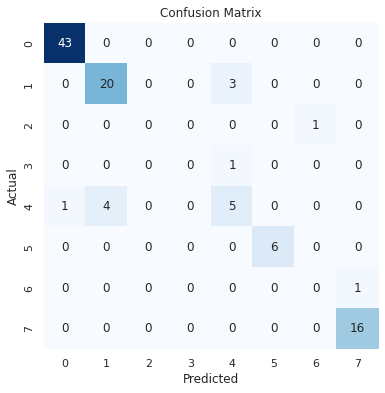

In [31]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, vmin=0, cmap='Blues', cbar=False)
plt.xticks(np.arange(8) + 0.5, rf_model.classes_)
plt.yticks(np.arange(8) + 0.5, rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Τέλος, δύο ακόμα μετρικές που μπορούμε να υπολογίσουμε για την απόδοση του μοντέλου είναι η ακρίβεια και το f1 score. Αυτά γίνοτνται μέσω των συναρτήσεων `precision_score()` και `f1_score()` αντίστοιχα.

In [32]:
rf_prec = metrics.precision_score(y_test, rf_pred, average='weighted', zero_division=1)
print("Random Forest | Precision: {:.2f}%".format(rf_prec * 100))

Random Forest | Precision: 88.91%


In [33]:
rf_f1 = metrics.f1_score(y_test, rf_pred, average='weighted')
print("Random Forest | F1 Score: {:.2f}%".format(rf_f1 * 100))

Random Forest | F1 Score: 87.98%


# **Συμπεράσματα**



Παρακάτω βλέπουμε ένα γράφημα με τα αποτελέσματα των διάφορων μοντέλων που χρησιμοποιήθηκαν με το **Random Forest Classifier** να αποδίδει καλύτερα.

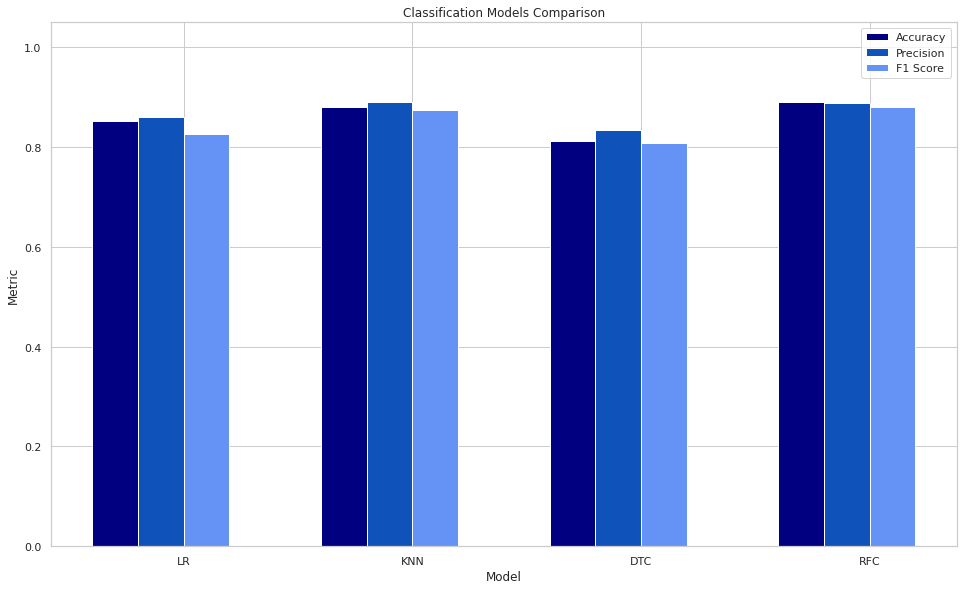

In [34]:
data = np.array([[lr_score, lr_prec, lr_f1], [knn_score, knn_prec, knn_f1], 
                 [dt_score, dt_prec, dt_f1], [rf_score, rf_prec, rf_f1]])  

length = len(data)
x_labels = ['LR', 'KNN', 'DTC', 'RFC']

# Set plot parameters
fig, ax = plt.subplots()
width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, data[:,0], width, color='#000080', label='Accuracy')
ax.bar(x + width, data[:,1], width, color='#0F52BA', label='Precision')
ax.bar(x + (2 * width), data[:,2], width, color='#6593F5', label='F1 Score')

ax.set_ylabel('Metric')
ax.set_ylim(0,1.05)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Model')
ax.set_title('Classification Models Comparison')
ax.legend()

fig.tight_layout()
fig.set_size_inches(15,10)
plt.show()